# Sinkhorn Distence 1D

In [83]:
using PyPlot
using PyCall
using LinearAlgebra
ot = pyimport("ot")

include("code/sinkhorn.jl")

sinkhorn_signal_1d_linear (generic function with 1 method)

In [8]:
function gauss_func(t, b, c)
    y = exp.(-(t.-b).^2 ./ (2*c^2));
    return y
end

function sin_func(t, omega, phi)
    return sin.(2*pi*omega*(t .- phi));
end

function ricker_func(t, t0, sigma)
    t = t.-t0;
    f = (1 .- t.^2 ./ sigma.^2) .* exp.(- t.^2 ./ (2 .* sigma.^2));
    return f
end

ricker_func (generic function with 1 method)

In [9]:
N = 101
x = range(0, stop=1, length=N)
# Build loss matrix
M = cost_func_1d(N);

## Example for Gaussian

In [10]:
# r = gauss_func(x, 0.4, 0.1)
# c = gauss_func(x, 0.6, 0.2)
# # r[1:3] .= 0
# r = r ./ norm(r,1)
# c = c ./ norm(c,1)
# plot(x,r,x,c)
# norm(c,1)

# # using Python Sinkhorn code
# lambd = 1e-3
# Gs = ot.sinkhorn(r, c, M, lambd, verbose=true)
# imshow(Gs)
# sum(Gs .* M)

## Example for Ricker

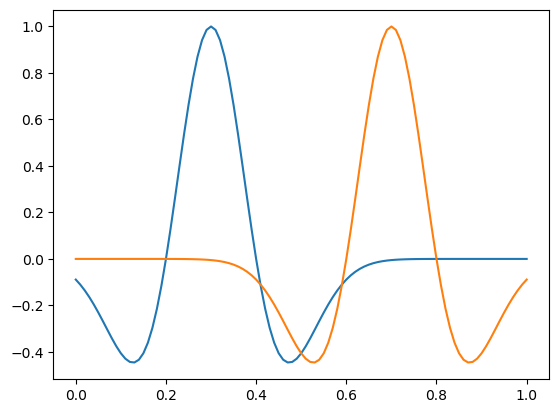

2-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x104cad8e48>
 PyObject <matplotlib.lines.Line2D object at 0x104cad8f98>

In [104]:
r = ricker_func(x, 0.3, 0.1)
c = ricker_func(x, 0.7, 0.1)

plot(x,r,x,c)

# # using Python Sinkhorn code
# lambd = 1e-3
# Gs = ot.sinkhorn(r, c, M, lambd, verbose=true)
# imshow(Gs)
# sum(Gs .* M)

## Separate into positive and negative parts. Normalization.

In [105]:
T1, grad1, d1 = sinkhorn_signal_1d(r, c, M; lambda=1000, numItermax = 1000, stopThr = 1e-6, verbose=true);

Iteration number: 1000
Error: 4.253530093572062e37
Iteration number: 1000
Error: 6.69429713993422e117


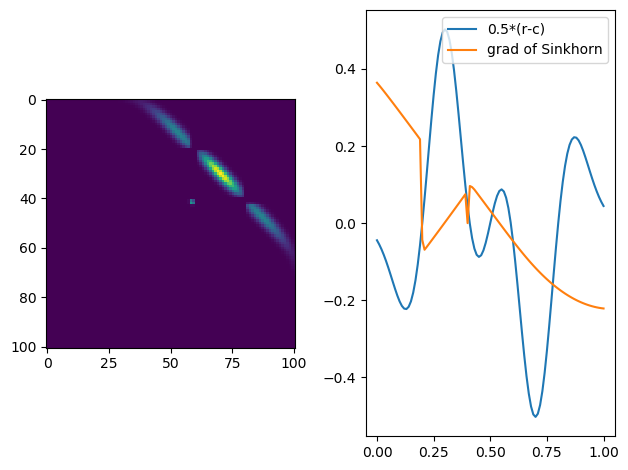

In [106]:
figure;
subplot(121); imshow(T1)
subplot(122);
plot(x, 0.5*(r-c), x, grad1); legend(["0.5*(r-c)", "grad of Sinkhorn"])
tight_layout()

## Linear normalization: just add a constant

In [107]:
T2, grad2, d2 = sinkhorn_signal_1d_linear(r, c, M; lambda=500, numItermax = 1000, stopThr = 1e-6, verbose=true);

Iteration number: 1000
Error: 103.54648215404947


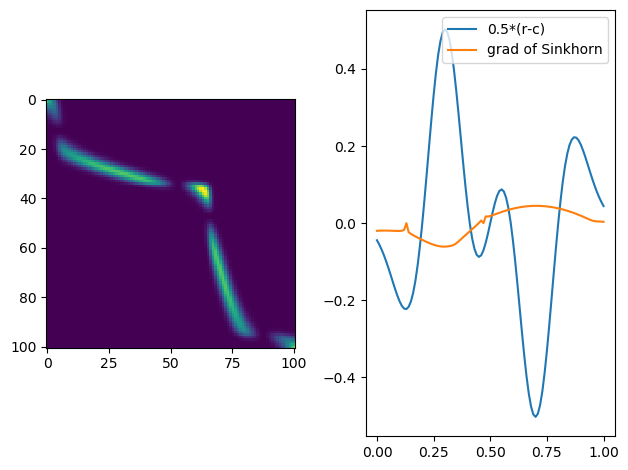

In [108]:
figure;
subplot(121); imshow(T2)
subplot(122);
plot(x, 0.5*(r-c), x, grad2); legend(["0.5*(r-c)", "grad of Sinkhorn"])
tight_layout()

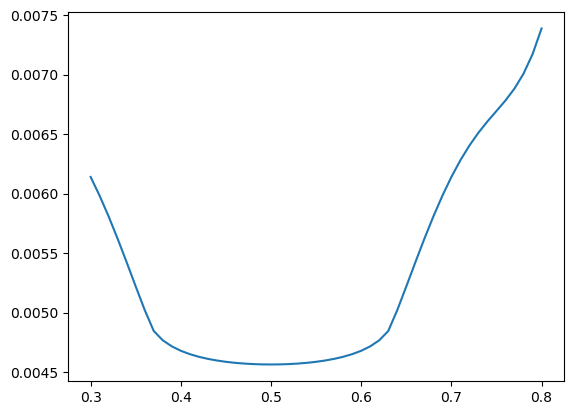

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x104bc5a128>

In [96]:

misfit = 0.3:0.01:0.8
n = length(misfit)
val1 = zeros(n)
val2 = zeros(n)
c = ricker_func(x, 0.5, 0.05)

for i = 1:n
    r = ricker_func(x, misfit[i], 0.1)
#     T, a, val1[i] = sinkhorn_signal_1d(r, c, M; lambda=1000, numItermax = 1000, stopThr = 1e-6, verbose=false);
    T, a, val2[i] = sinkhorn_signal_1d_linear(r, c, M; lambda=500, numItermax = 1000, stopThr = 1e-6, verbose=false);
end
# plot(misfit, val1)
plot(misfit, val2)

# Gradient

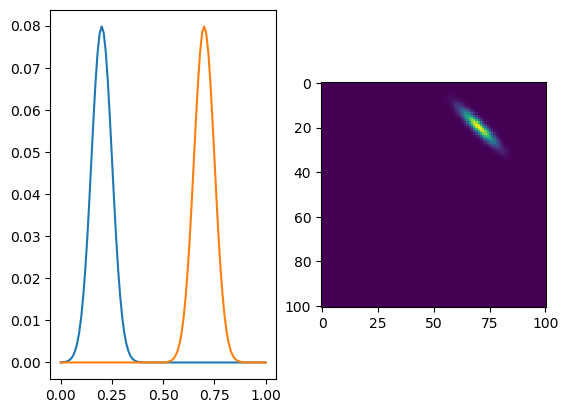

0.2504707166305735

In [15]:
r = gauss_func(x, 0.2, 0.05)
c = gauss_func(x, 0.7, 0.05)
# r[1:3] .= 0
r = r ./ norm(r,1)
c = c ./ norm(c,1)
figure; subplot(121)
plot(x,r,x,c)

# using Python Sinkhorn code
lambd = 1e-3
Gs = ot.sinkhorn(r, c, M, lambd, verbose=true)
subplot(122)
imshow(Gs)
sum(Gs .* M)

In [16]:
T = Gs;

n, m = size(T)
T_bar = T[1:n, 1:(m-1)]

L = T .* M
L_bar = L[1:n, 1:(m-1)]

D1 = diagm(T * ones(m))
D2 = diagm(T_bar' * ones(n))
D2 = inv(D2)

H = D1 - T_bar * D2 * T_bar'

f = -1*L*ones(m) + T_bar * D2 * L_bar' * ones(n)

g = inv(H) * f

G = g - ones(n) * g' * ones(n)

101-element Array{Float64,1}:
 28.853599607961762
 28.86349363085445 
 28.873449725510014
 28.883436970488205
 28.89343899402865 
 28.903447472354372
 28.913458389945838
 28.923469904755635
 28.933481203991498
 28.943491927933813
 28.953501900516144
 28.96351102964038 
 28.97351926003786 
  ⋮                
 29.59227913367245 
 29.594380018774235
 29.59628076405551 
 29.597981391136795
 29.599481918389415
 29.60078236140607 
 29.601882733404768
 29.602783045578647
 29.603483307394896
 29.603983526854073
 29.604283710709986
 29.604383864660072

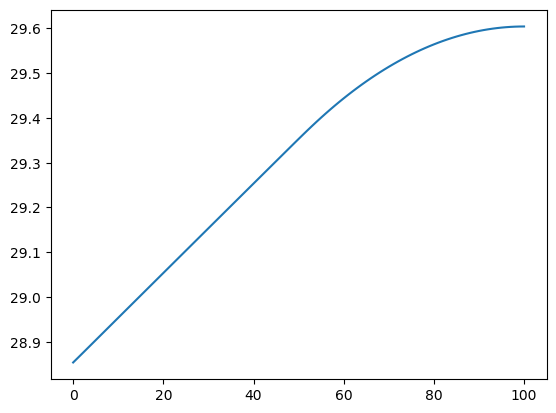

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1040814b00>

In [17]:
plot(G)

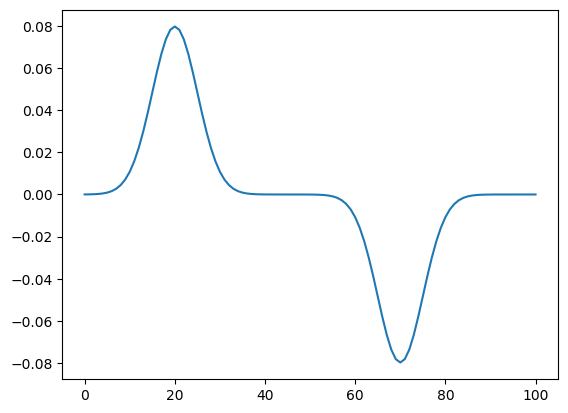

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x138fa1978>

In [18]:
G1 = r - c;
plot(G1)

# Linear normalization

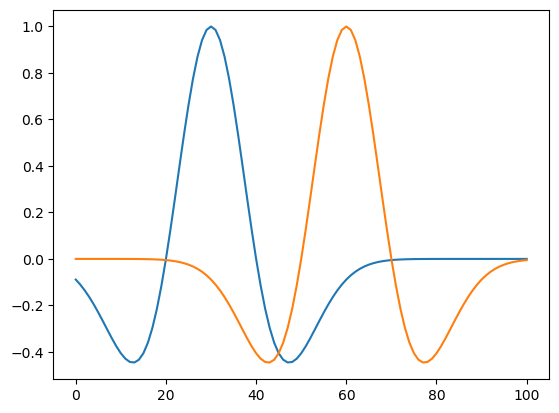

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1040d57780>

In [57]:
r = ricker_func(x, 0.3, 0.1)
c = ricker_func(x, 0.6, 0.1)
plot(r)
plot(c)

In [58]:
mi = min(minimum(r), minimum(c))

-0.44556008469058206

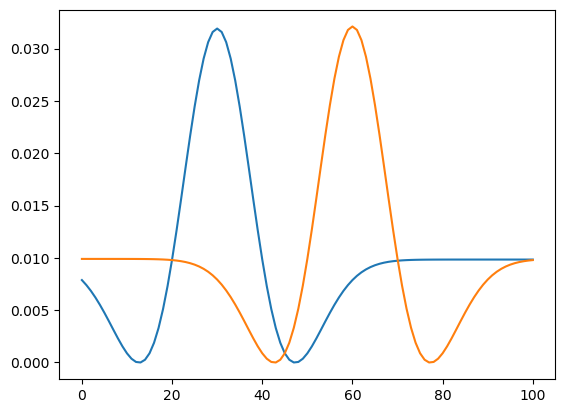

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1040d949e8>

In [59]:
r = r .- mi
c = c .- mi
r = r ./ norm(r,1)
c = c ./ norm(c,1)
plot(r)
plot(c)

In [60]:
include("code/sinkhorn.jl")

sinkhorn_signal_1d_linear (generic function with 1 method)

In [61]:
T, a, d = sinkhorn_basic(r, c, M; lambda=5000, numItermax = 100, stopThr = 1e-6, verbose=false)

([0.00713280739890137 0.004348185255115021 … 0.0 0.0; 0.0024582443327888733 0.0040734938992475975 … 0.0 0.0; … ; 0.0 0.0 … 0.003018682618799052 0.003195575027621685; 0.0 0.0 … 0.00179957935864215 0.005178417354955194], [0.01112757607424711, 0.011240627572692011, 0.011363951385465946, 0.01151754949663103, 0.01167618755469376, 0.011811882502412475, 0.011896936911357344, 0.011902711333883874, 0.011799161872800478, 0.01156405225282889  …  -0.00876624322704498, -0.008324147985433617, -0.007923671675128367, -0.007567842228187094, -0.007259037409439592, -0.006999130718338499, -0.006789035952446374, -0.00662872472157568, -0.006528334244018972, -0.006524880730153828], 0.005523683840992537)

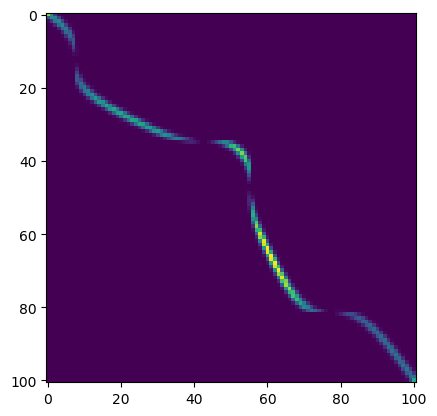

PyObject <matplotlib.image.AxesImage object at 0x104244df98>

In [62]:
imshow(T)

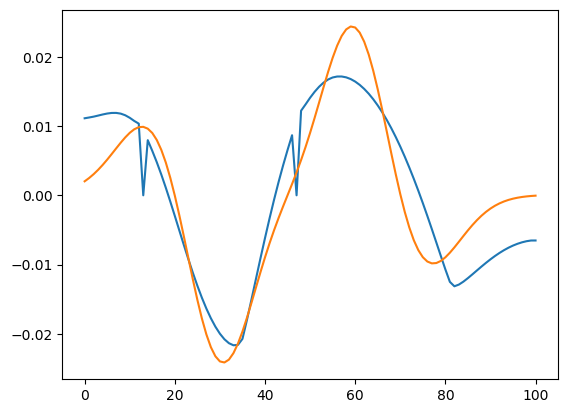

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1042b70160>

In [63]:
plot(a)
plot(c-r)

In [86]:
r = ricker_func(x, 0.3, 0.1)
c = ricker_func(x, 0.6, 0.1)
T, a, d = sinkhorn_signal_1d_linear(r, c, M; lambda=5000, numItermax = 10000, stopThr = 1e-9, verbose=false)

([0.005540712862205073 0.0020871889376523553 … 0.0 0.0; 0.0031247848553833486 0.0031997107698790413 … 0.0 0.0; … ; 0.0 0.0 … 0.0039019656842541332 0.0029556999289542378; 0.0 0.0 … 0.0029781418405876 0.006132206279255643], [0.0008699384649716677, 0.0008844900116573616, 0.0008047809027064189, 0.0006579390301233428, 0.00044038536800021424, 0.0001374144639391126, -0.00026618882762543226, -0.0007885866633620675, -0.0014488868029006938, -0.002252342031637286  …  -0.011395098506568984, -0.011493060261784226, -0.011560398273167688, -0.01160594361032993, -0.011635998877442467, -0.01165517682914409, -0.011666803933451755, -0.011671917214534526, -0.011676144690638286, -0.011722108513606944], 0.012274588768409785)

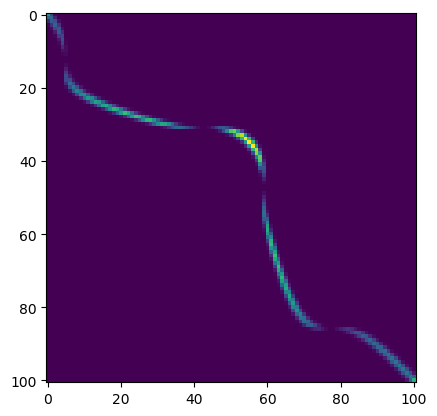

PyObject <matplotlib.image.AxesImage object at 0x103ec41128>

In [87]:
imshow(T)

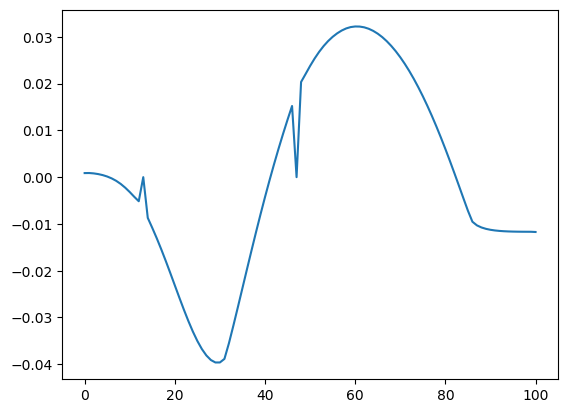

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1043a9b3c8>

In [88]:
plot(a)

In [82]:
A = randn(4,5)

4×5 Array{Float64,2}:
 -0.0823884  0.628343  -0.317451    0.970044  -0.419382
  0.341643   1.4251    -0.768114    1.30436    1.46023 
  1.03154    0.338132  -0.0879486  -0.382251  -0.756978
 -0.49538    1.30778    1.0726      1.36833    1.91345 

In [83]:
minimum(A)

-0.7681135561117862